   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00

 Model Comparison Results:

           Model  Accuracy  Precision    Recall        F1
0  Random Forest   0.83000   0.812500  0.864532  0.837709
1       AdaBoost   0.74500   0.741627  0.763547  0.752427
2       CatBoost   0.84000   0.820276  0.876847  0.847619
3           LGBM   0.80875   0.792148  0.844828  0.817640
4        XGBoost   0.81625   0.796339  0.857143  0.825623


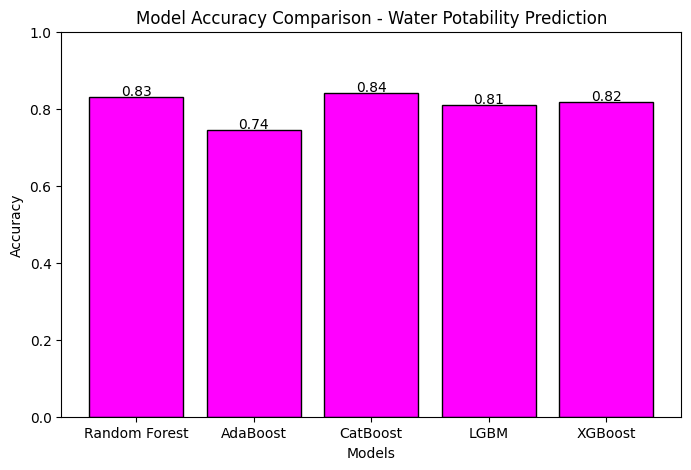

In [1]:
!pip install optuna
!pip install catboost
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


# Step 1: Load dataset

df = pd.read_csv('water_potability_final.csv')

X = df.drop('Potability', axis=1)
y = df['Potability']
groups = np.arange(len(X)) % 5

X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(
    X, y, groups, test_size=0.2, random_state=42
)

# Step 2: Initialize results

results = []


# Step 3: Define a helper to evaluate models

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1})


# Step 4: Train and evaluate models


# Random Forest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
evaluate_model("Random Forest", rf, X_train_scaled, X_test_scaled, y_train, y_test)

# AdaBoost
base_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
ada = AdaBoostClassifier(estimator=base_tree, n_estimators=150, learning_rate=0.1, random_state=42)
evaluate_model("AdaBoost", ada, X_train, X_test, y_train, y_test)

# CatBoost
cat = CatBoostClassifier(iterations=400, depth=8, learning_rate=0.05, verbose=0, random_seed=42)
evaluate_model("CatBoost", cat, X_train, X_test, y_train, y_test)

# LightGBM
lgbm = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42, verbosity=-1)
evaluate_model("LGBM", lgbm, X_train, X_test, y_train, y_test)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.05, random_state=42, verbosity=0)
evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)


# Step 5: Convert results to DataFrame

df_results = pd.DataFrame(results)
print("\n Model Comparison Results:\n")
print(df_results)


# Step 6: Plot comparison graph

plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color='magenta', edgecolor='black')
plt.title("Model Accuracy Comparison - Water Potability Prediction")
plt.xlabel("Models")
plt.ylabel("Accuracy")
for i, v in enumerate(df_results["Accuracy"]):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=10)
plt.ylim(0, 1)
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load dataset
df = pd.read_csv('water_potability_final.csv')

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: To store results
results = []

# Step 3: Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, round(acc,3), round(prec,3), round(rec,3), round(f1,3), round(r2,3)])

# Step 4: Train models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
evaluate_model("Random Forest", rf, X_train_scaled, X_test_scaled, y_train, y_test)

base_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
ada = AdaBoostClassifier(estimator=base_tree, n_estimators=150, learning_rate=0.1, random_state=42)
evaluate_model("AdaBoost", ada, X_train, X_test, y_train, y_test)

cat = CatBoostClassifier(iterations=400, depth=8, learning_rate=0.05, verbose=0, random_seed=42)
evaluate_model("CatBoost", cat, X_train, X_test, y_train, y_test)

lgbm = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42, verbosity=-1)
evaluate_model("LGBM", lgbm, X_train, X_test, y_train, y_test)

xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.05, random_state=42, verbosity=0)
evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# Step 5: Create DataFrame
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "R2 Score"]
df_results = pd.DataFrame(results, columns=columns)

# Step 6: Display table with borders
print("\n Model Performance Comparison:\n")
print(tabulate(df_results, headers="keys", tablefmt="grid", showindex=False))

# Step 7: Save to CSV (optional)
df_results.to_csv("model_performance_comparison.csv", index=False)



 Model Performance Comparison:

+---------------+------------+-------------+----------+------------+------------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |   R2 Score |
+===============+============+=============+==========+============+============+
| Random Forest |      0.83  |       0.812 |    0.865 |      0.838 |      0.32  |
+---------------+------------+-------------+----------+------------+------------+
| AdaBoost      |      0.745 |       0.742 |    0.764 |      0.752 |     -0.02  |
+---------------+------------+-------------+----------+------------+------------+
| CatBoost      |      0.84  |       0.82  |    0.877 |      0.848 |      0.36  |
+---------------+------------+-------------+----------+------------+------------+
| LGBM          |      0.809 |       0.792 |    0.845 |      0.818 |      0.235 |
+---------------+------------+-------------+----------+------------+------------+
| XGBoost       |      0.816 |       0.796 |    0.857 |      0.82

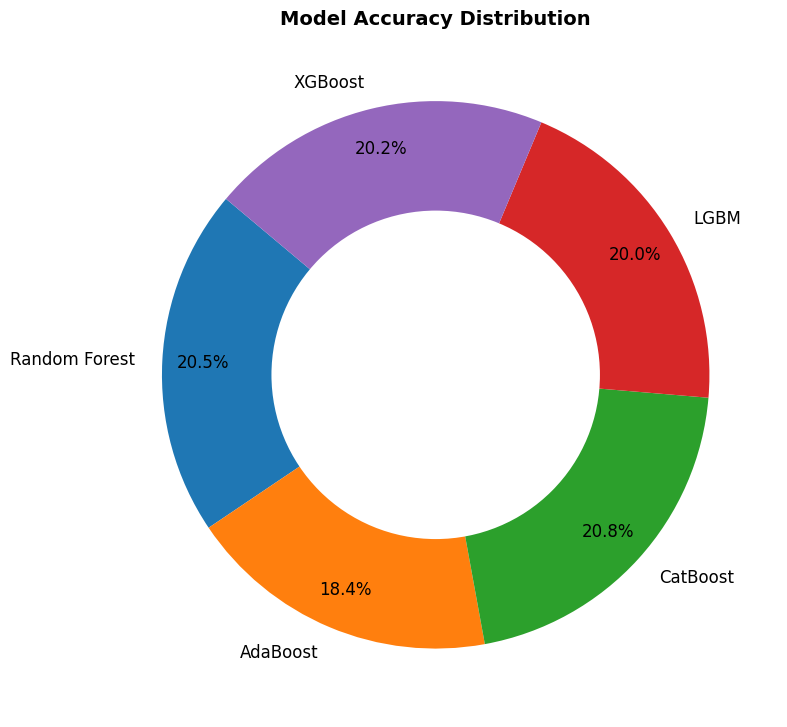

In [5]:
# PIE CHART for Accuracy Distribution

plt.figure(figsize=(8,8))

plt.pie(
    df_results["Accuracy"],
    labels=df_results["Model"],
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Donut style
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Model Accuracy Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
